# **1. Custom Implementation**

In [ ]:
nodes=['A','B','C','D','E']

In [ ]:
adj_matrix=[
            [1,0,0,0,0],
            [1,0,1,0,1],
            [1,0,0,1,1],
            [1,0,0,0,0],
            [1,0,0,0,1]
]
adj_matrix

[[1, 0, 0, 0, 0],
 [1, 0, 1, 0, 1],
 [1, 0, 0, 1, 1],
 [1, 0, 0, 0, 0],
 [1, 0, 0, 0, 1]]

In [ ]:
#finding counts of inbound and outbound degree
ob=[]
ib=[]

for i in range(5):
  o_s=0
  i_s=0
  for j in range(5):
    if adj_matrix[i][j]==1:
      o_s+=1
    elif adj_matrix[j][i]==1:
      i_s+=1
  ob.append(o_s)
  ib.append(i_s)

print("number of outbound degrees:",ob,"\nnumber of inbound degrees:",ib)

number of outbound degrees: [1, 3, 3, 1, 2] 
number of inbound degrees: [4, 0, 1, 1, 2]


In [ ]:
import numpy as np
s=np.array(ob)
s=np.argsort(s)
print("Initial hub ranks:")
for i in reversed(s):
  print(nodes[i])


s=np.array(ib)
s=np.argsort(s)
print("\nInitial authority ranks:")
for i in reversed(s):
  print(nodes[i])

Initial hub ranks:
C
B
E
D
A

Initial authority ranks:
A
E
D
C
B


In [ ]:
#calculating authority weight and hub weight vector
u=[[1,1,1,1,1]]
aut=[[0,0,0,0,0]]
hub=[[0,0,0,0,0]]
for i in range(5):
  for j in range(1):
    for m in range(5):
      aut[j][i]+=adj_matrix[m][i]*u[j][m]

for i in range(5):
  for j in range(1):
    for m in range(5):
      hub[j][i]+=adj_matrix[i][m]*aut[j][m]

aut=aut[0]
hub=hub[0]
print("Authority weight vector:",aut)
print("Hub weight vector:",hub)

Authority weight vector: [5, 0, 1, 1, 3]
Hub weight vector: [5, 9, 9, 5, 8]


In [ ]:
k=4
import math
for _ in range(k):
  aut1=aut
  hub1=hub

  #normalizing
  aut_n=math.sqrt(sum([i**2 for i in aut]))
  hub_n=math.sqrt(sum([i**2 for i in hub]))

  for i in range(5):
    aut[i]=aut[i]/aut_n
    hub[i]=hub[i]/hub_n

In [ ]:
print(f"Authority scores of the nodes after {k} iterations : ") 
for i in range(5) :
    print(nodes[i], " : ", aut[i])

Authority scores of the nodes after 4 iterations : 
A  :  0.8333333333333334
B  :  0.0
C  :  0.16666666666666666
D  :  0.16666666666666666
E  :  0.5


In [ ]:
print(f"Hub scores of the nodes after {k} iterations : ") 
for i in range(5) :
    print(nodes[i], " : ", hub[i])

Hub scores of the nodes after 4 iterations : 
A  :  0.30096463271442303
B  :  0.5417363388859615
C  :  0.5417363388859615
D  :  0.30096463271442303
E  :  0.4815434123430768


# **2. Inbuild HITS Algorithm**

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

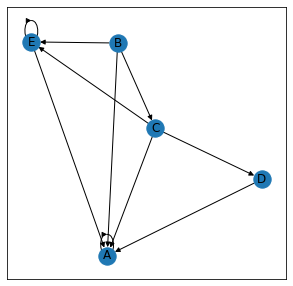

In [ ]:
G=nx.DiGraph()
G.add_edges_from([('A', 'A'), ('B', 'A'), ('B', 'C'), ('B', 'E'),
                  ('C', 'D'), ('C', 'A'), ('C', 'E'), ('D', 'A'),
                  ('E', 'A'), ('E', 'E')])
plt.figure(figsize =(5, 5))
nx.draw_networkx(G, with_labels = True)

In [ ]:
hubs, auth = nx.hits(G, max_iter = k, normalized = True)

In [ ]:
print(f"Authority scores of the nodes after {k} iterations : ") 
for i in auth:
  print(i,":",auth[i])

Authority scores of the nodes after 4 iterations : 
A : 0.44280260848972464
B : 0.0
C : 0.11439478302055081
E : 0.32840782546917385
D : 0.1143947830205508


In [ ]:
print(f"Hub scores of the nodes after {k} iterations : ") 
for i in hubs:
  print(i,":",hubs[i])

Hub scores of the nodes after 4 iterations : 
A : 0.1291713066130293
B : 0.2583426132260586
C : 0.2583426132260586
E : 0.22497216032182416
D : 0.1291713066130293


**Conclusion: Program executed successfully and observed that the authority and hubs score are in similar order in both Custom implementation and Inbuild HITS algorithms.**